# ECE 590, Fall 2019 
## Problem Set 1 
* ### __Important :__  You are only allowed to use the Python built in function for generating uniform random variables.

## Full name: Ana Belen Barcenas Jimenez


### Problem 1 (Exponential distribution)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Function that generates exponential distributed random variables

def ExponentialRV(lamb): #lamb = lambda
    # Generate 10^5 random samples from a standard uniform distribution
    U = np.random.uniform(0,1,10**5)
    X=-np.log(1-U)/lamb
    return X 

/Users/anabelen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


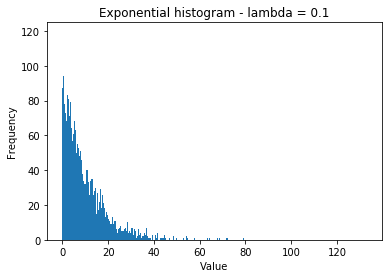

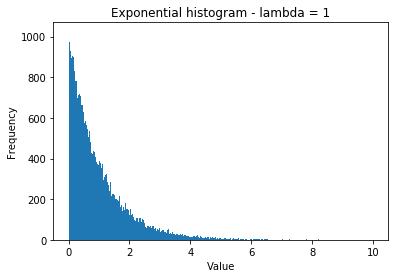

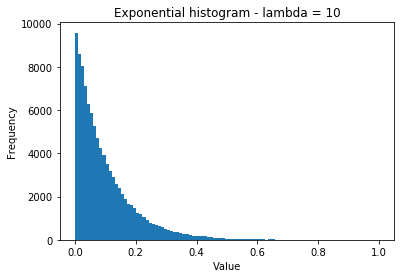

In [15]:
# Exponential histogram

for lamb in [0.1,1,10]:
    X = ExponentialRV(lamb)
    # Let's create a list of bins 
    bins = list(np.linspace(round(min(X)), round(max(X)), num = ((round(max(X))-round(min(X)))/0.01)))
    plt.hist(X, bins=bins)
    title = "Exponential histogram - lambda = " + str(lamb)
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

### Sources: 
* https://gist.github.com/idrissrasheed/312d444693991cb6e341a36fe49ad6a8
* https://www.youtube.com/watch?v=Ce_tWXEPTtY

### Problem 2 (Gamma distribution)

In [16]:
# Function that generates gamma distributed random variables

def GammaRV(K, beta): # 1/lambda = beta
    lamb = 1/beta
    # Let's define the Gamma function
    x = np.zeros((10**5,),dtype=float)
    for i in range(1,K+1):
        exp = ExponentialRV(lamb)
        x = np.add(x, exp)
    return x 

/Users/anabelen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


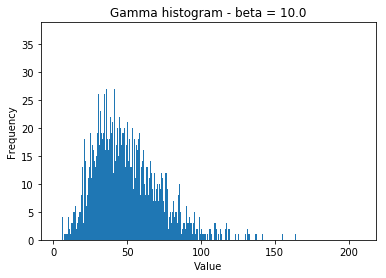

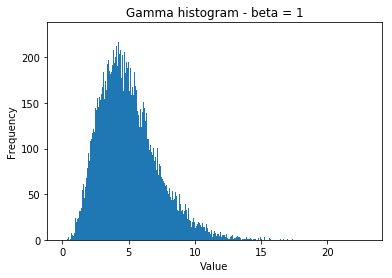

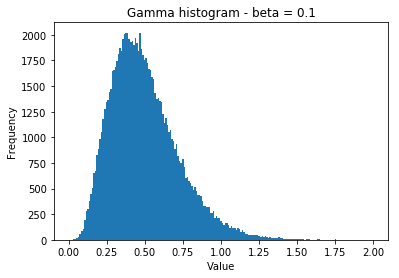

In [17]:
# Gamma histogram

K=5
for beta in [1/0.1,1,1/10]:
    X = GammaRV(K,beta)
    # Let's create a list of bins 
    bins = list(np.linspace(round(min(X)), round(max(X)), num = ((round(max(X))-round(min(X)))/0.01)))
    plt.hist(X, bins=bins)
    title = "Gamma histogram - beta = " + str(beta)
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

### Problem 3 (Beta distribution)

In [18]:
# Function that generates Gamma distributed random variables

def BetaRV(alpha1, alpha2):
    # Define k and n
    k = alpha1
    n = (alpha2 + k - 1)
    X = np.zeros((10**5,),dtype=float)
    for i in range(10**5):
        # Generate n uniform random variables
        unif = np.random.uniform(0,1,n)
        # Sort uniform r.v. in increasing order
        unif_sort = np.sort(unif)
        # Select the k-th value as a beta r.v. and store it
        X[i] = unif_sort[k+1]
    return X


/Users/anabelen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


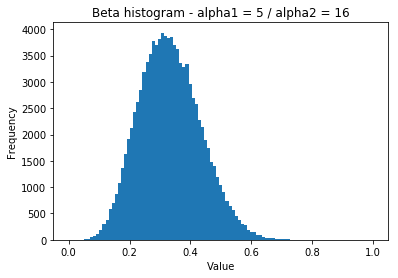

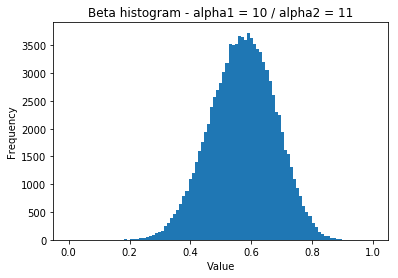

In [19]:
# Beta histogram

for alpha1, alpha2 in [[5,16],[10,11]]:
    X = BetaRV(alpha1, alpha2)
    # Let's create a list of bins 
    bins = list(np.linspace(round(min(X)), round(max(X)), num = ((round(max(X))-round(min(X)))/0.01)))
    plt.hist(X, bins=bins)
    title = "Beta histogram - alpha1 = " + str(alpha1) + " / alpha2 = " + str(alpha2)
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

### Problem 4 (Dirichlet distribution)

In [92]:
# 1) USE GAMMA DISTRIBUTED RANDOM VARIABLES TO GENERATE THE DIRICHLET DSTR. R. V.


# First, I'm gonna create a function to generate ONE exponential RV:
def ExponentialRV_one(lamb): #lamb = lambda
    # Generate 10^5 random samples from a standard uniform distribution
    U = np.random.uniform(0,1,1)
    X = -np.log(1-U)/lamb
    return X 

# Second, I'm gonna create a function to generate ONE gamma RV:
def GammaRV_one(K, beta): # 1/lambda = beta
    lamb = 1/beta
    # Let's define the Gamma function
    x = 0
    for i in range(1,K+1):
        exp = ExponentialRV_one(lamb)
        x += exp
    return x 

# Now, let's use the functions above to generate 
# random vectors distributed as a Dirichlet distribution

def DirichletRV(N,beta):
    V = 0
    gammas = np.zeros((N,1),dtype=float)
    for i in range(1,N+1):
        gamma_rv = GammaRV_one(i, beta) # Beta can be any valid number in this case
        gammas[i-1] = gamma_rv
        V += gamma_rv
    #print('Sum of the i elements in the vector: ' + str(V))
    #print('\nGamma distributed random elements in the vector: '+ '\n' + str(gammas))

    D = np.zeros((1,N),dtype=float)
    for i in range(1,N+1):
        D[:,i-1] = gammas[i-1]/V
    #print('\nDirichlet distributed random vectors: ')
    #print(D)
    return D
    
# Let's create an array of the two dimensional 10^5 dirichlet distributed vectors
def main(N,beta):
    D_2dim = np.zeros((10**5,2),dtype=float)
    for j in range(len(D_2dim)):
        D = DirichletRV(N,beta)
        vect = D[:,0:2]
        D_2dim[j] = vect
    print('\nDirichlet distributed random vectors (2 dimensional): ')
    print(len(D_2dim))
    return D_2dim


Dirichlet distributed random vectors (2 dimensional): 
100000


/Users/anabelen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """


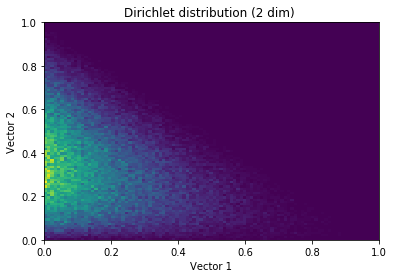

In [93]:
# Dirichlet 2-dimensions histogram

X = main(3,1)
# Let's create a list of bins 
bins = list(np.linspace(round(np.amin(X)), round(np.amax(X)), num = ((round(np.amax(X))-round(np.amin(X)))/0.01)))
plt.hist2d(X[:,0], X[:,1], bins=bins)
title = "Dirichlet distribution (2 dim) " 
plt.title(title)
plt.xlabel("Vector 1")
plt.ylabel("Vector 2")
plt.show()

In [23]:
# 2) USE BETA DISTRIBUTED RANDOM VARIABLES TO GENERATE THE DIRICHLET DSTR. R. V.

def BetaRV_one(alpha1, alpha2):
    # Define k and n
    k = alpha1
    n = (alpha2 + k - 1)
    # Generate n uniform random variables
    unif = np.random.uniform(0,1,n)
    # Sort uniform r.v. in increasing order
    unif_sort = np.sort(unif)
    # Select the k-th value as a beta r.v. and store it
    beta_rv = unif_sort[k+1]
    return beta_rv

In [87]:
# Let's define some parameters that we'll keep fixed along the iterations:

def DirichletRV_beta(alpha_1, alpha_2, alpha_3):
    # Let's define some of the parameters we're gonna use
    k_ = 3
    j = k_ + 1
    #alpha_1, alpha_2, alpha_3 = 10, 10, 10

    D_2dim_ = np.zeros((10**5,2),dtype=float)
    Y = np.zeros((len(D_2dim_), k_),dtype=float)
    
    for i in range(len(D_2dim_)):
        X_1 = BetaRV_one(alpha_1, (alpha_2+alpha_3))
        X_2 = BetaRV_one(alpha_2, alpha_3)

        Y[i,0] = X_1
        Y[i,1] = (1-X_1)*X_2
        Y[i,2] = 1-(np.sum(Y[i]))
        
        Y_2dim = Y[:,0:2]
    
    return Y_2dim

/Users/anabelen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """


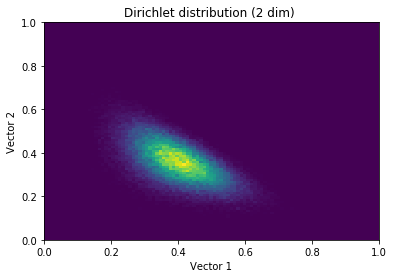

In [88]:
# Dirichlet 2-dimensions histogram

X = DirichletRV_beta(10,10,10)
# Let's create a list of bins 
bins = list(np.linspace(round(np.amin(X)), round(np.amax(X)), num = ((round(np.amax(X))-round(np.amin(X)))/0.01)))
plt.hist2d(X[:,0], X[:,1], bins=bins)
title = "Dirichlet distribution (2 dim) " 
plt.title(title)
plt.xlabel("Vector 1")
plt.ylabel("Vector 2")
plt.show()